In [ ]:
# import torch
# import torchvision
# import torchvision.transforms as transforms
# import torchvision.datasets as datasets
# import torch.nn.functional as F
# import torch.nn as nn
# import torch.optim as optim
# import os
# import matplotlib.pyplot as plt
# from torch.optim.lr_scheduler import StepLR
# import numpy as np
# from datetime import datetime
# import pandas as pd
# import random 
# from torchvision.datasets import ImageFolder
# import re
# from torch.utils.data import Dataset, DataLoader
# import matplotlib.pyplot as plt
# from PIL import Image
# from torch.optim.lr_scheduler import StepLR
# from sklearn.metrics import roc_auc_score
# from skimage.io import imread, imsave
# import skimage
# from PIL import ImageFile
# from PIL import Image

# torch.cuda.empty_cache()

In [ ]:
# ## authorize access to google drive
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# # navigate to project directory
# %cd '/content/drive/My Drive/Colab Notebooks/COVID-CT-master'

/content/drive/My Drive/Colab Notebooks/COVID-CT-master


In [ ]:
# normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

########## Mean and std are calculated from the train dataset
# normalize = transforms.Normalize(mean=[0.45271412, 0.45271412, 0.45271412],
#                                      std=[0.33165374, 0.33165374, 0.33165374])
# train_transformer = transforms.Compose([
#     transforms.Resize(256),
#     transforms.RandomResizedCrop((224),scale=(0.5,1.0)),
#     transforms.RandomHorizontalFlip(),
# #     transforms.RandomRotation(90),
#     # random brightness and random contrast
#     transforms.ColorJitter(brightness=0.2, contrast=0.2),
#     transforms.ToTensor(),
#     normalize
# ])

# val_transformer = transforms.Compose([
# #     transforms.Resize(224),
# #     transforms.CenterCrop(224),
#     transforms.Resize((224,224)),
#     transforms.ToTensor(),
#     normalize
# ])

In [ ]:
# batchsize=4
# def read_txt(txt_path):
#     with open(txt_path) as f:
#         lines = f.readlines()
#     txt_data = [line.strip() for line in lines]
#     return txt_data

# class CovidCTDataset(Dataset):
#     def __init__(self, root_dir, txt_COVID, txt_NonCOVID, transform=None):
#         """
#         Args:
#             txt_path (string): Path to the txt file with annotations.
#             root_dir (string): Directory with all the images.
#             transform (callable, optional): Optional transform to be applied
#                 on a sample.
#         File structure:
#         - root_dir
#             - CT_COVID
#                 - img1.png
#                 - img2.png
#                 - ......
#             - CT_NonCOVID
#                 - img1.png
#                 - img2.png
#                 - ......
#         """
#         self.root_dir = root_dir
#         self.txt_path = [txt_COVID,txt_NonCOVID]
#         self.classes = ['CT_COVID', 'CT_NonCOVID']
#         self.num_cls = len(self.classes)
#         self.img_list = []
#         for c in range(self.num_cls):
#             cls_list = [[os.path.join(self.root_dir,self.classes[c],item), c] for item in read_txt(self.txt_path[c])]
#             self.img_list += cls_list
#         self.transform = transform

#     def __len__(self):
#         return len(self.img_list)

#     def __getitem__(self, idx):
#         if torch.is_tensor(idx):
#             idx = idx.tolist()

#         img_path = self.img_list[idx][0]
#         image = Image.open(img_path).convert('RGB')

#         if self.transform:
#             image = self.transform(image)
#         sample = {'img': image,
#                   'label': int(self.img_list[idx][1])}
#         return sample



    
# if __name__ == '__main__':
#     trainset = CovidCTDataset(root_dir='./Images-processed',
#                               txt_COVID='./Data-split/COVID/trainCT_COVID.txt',
#                               txt_NonCOVID='./Data-split/NonCOVID/trainCT_NonCOVID.txt',
#                               transform= train_transformer)
#     valset = CovidCTDataset(root_dir='./Images-processed',
#                               txt_COVID='./Data-split/COVID/valCT_COVID.txt',
#                               txt_NonCOVID='./Data-split/NonCOVID/valCT_NonCOVID.txt',
#                               transform= val_transformer)
#     testset = CovidCTDataset(root_dir='./Images-processed',
#                               txt_COVID='./Data-split/COVID/testCT_COVID.txt',
#                               txt_NonCOVID='./Data-split/NonCOVID/testCT_NonCOVID.txt',
#                               transform= val_transformer)
#     print(trainset.__len__())
#     print(valset.__len__())
#     print(testset.__len__())

#     train_loader = DataLoader(trainset, batch_size=batchsize, drop_last=False, shuffle=True)
#     val_loader = DataLoader(valset, batch_size=batchsize, drop_last=False, shuffle=False)
#     test_loader = DataLoader(testset, batch_size=batchsize, drop_last=False, shuffle=False)
    

425
118
203


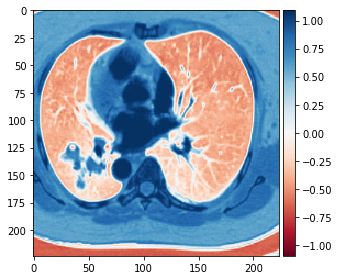

In [ ]:
# for batch_index, batch_samples in enumerate(train_loader):      
#         data, target = batch_samples['img'], batch_samples['label']
# skimage.io.imshow(data[0,1,:,:].numpy())

In [ ]:
# #training process is defined here 

# alpha = None
# ## alpha is None if mixup is not used
# alpha_name = f'{alpha}'
# device = 'cuda'

# def train(optimizer, epoch):
    
#     model.train()
    
#     train_loss = 0
#     train_correct = 0
    
#     for batch_index, batch_samples in enumerate(train_loader):
        
#         # move data to device
#         data, target = batch_samples['img'].to(device), batch_samples['label'].to(device)
        
#         optimizer.zero_grad()
#         output = model(data)
#         criteria = nn.CrossEntropyLoss()
#         loss = criteria(output, target.long())

#         train_loss += criteria(output, target.long())
        
#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()
        
#         pred = output.argmax(dim=1, keepdim=True)
#         train_correct += pred.eq(target.long().view_as(pred)).sum().item()
    
#         # Display progress and write to tensorboard
#         if batch_index % bs == 0:
#             print('Train Epoch: {} [{}/{} ({:.0f}%)]\tTrain Loss: {:.6f}'.format(
#                 epoch, batch_index, len(train_loader),
#                 100.0 * batch_index / len(train_loader), loss.item()/ bs))

In [ ]:
# #val process is defined here

# def val(epoch):
#     model.eval()
    
#     test_loss = 0
#     correct = 0
#     results = []
    
#     TP = 0
#     TN = 0
#     FN = 0
#     FP = 0
    
    
#     criteria = nn.CrossEntropyLoss()
#     # Don't update model
#     with torch.no_grad():
#         tpr_list = []
#         fpr_list = []
        
#         predlist=[]
#         scorelist=[]
#         targetlist=[]
#         # Predict
#         for batch_index, batch_samples in enumerate(val_loader):
#             data, target = batch_samples['img'].to(device), batch_samples['label'].to(device)
#             output = model(data)
#             test_loss += criteria(output, target.long())
#             score = F.softmax(output, dim=1)
#             pred = output.argmax(dim=1, keepdim=True)
#             correct += pred.eq(target.long().view_as(pred)).sum().item()
#             targetcpu=target.long().cpu().numpy()
#             predlist=np.append(predlist, pred.cpu().numpy())
#             scorelist=np.append(scorelist, score.cpu().numpy()[:,1])
#             targetlist=np.append(targetlist,targetcpu)
#     return targetlist, scorelist, predlist

In [ ]:
# #test process is defined here 
# def test(epoch):
#     model.eval()
#     test_loss = 0
#     correct = 0
#     results = []
    
#     TP = 0
#     TN = 0
#     FN = 0
#     FP = 0

#     criteria = nn.CrossEntropyLoss()
#     # Don't update model
#     with torch.no_grad():
#         tpr_list = []
#         fpr_list = []
#         predlist=[]
#         scorelist=[]
#         targetlist=[]
#         # Predict
#         for batch_index, batch_samples in enumerate(test_loader):
#             data, target = batch_samples['img'].to(device), batch_samples['label'].to(device)
#             output = model(data)
            
#             test_loss += criteria(output, target.long())
#             score = F.softmax(output, dim=1)
#             pred = output.argmax(dim=1, keepdim=True)
#             correct += pred.eq(target.long().view_as(pred)).sum().item()
#             targetcpu=target.long().cpu().numpy()
#             predlist=np.append(predlist, pred.cpu().numpy())
#             scorelist=np.append(scorelist, score.cpu().numpy()[:,1])
#             targetlist=np.append(targetlist,targetcpu)
#     return targetlist, scorelist, predlist

In [ ]:
# ### Dense169
# import torchvision.models as models
# """Load Self-Trans model"""
# """Change names and locations to the Self-Trans.pt"""

# model = models.densenet169(pretrained=True).cuda()
# pretrained_net = torch.load('./baseline methods/Self-Trans/Self-Trans.pt')
# model.load_state_dict(pretrained_net)
# modelname = 'Dense169_ssl_luna_moco'

Downloading: "https://download.pytorch.org/models/densenet169-b2777c0a.pth" to /root/.cache/torch/hub/checkpoints/densenet169-b2777c0a.pth


In [ ]:
# train
bs =batchsize
votenum = 10
import warnings
warnings.filterwarnings('ignore')

r_list = []
p_list = []
acc_list = []
AUC_list = []
vote_pred = np.zeros(valset.__len__())
vote_score = np.zeros(valset.__len__())

optimizer = optim.Adam(model.parameters(), lr=0.0001)
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=10)
scheduler = StepLR(optimizer, step_size=1)

start_epoch = 1
total_epoch = 3000

checkpoint_interval = 10

# path_checkpoint = "./checkpoint_1_epoch.pkl"#断点路径
# checkpoint = torch.load(path_checkpoint)#加载断点
# model.load_state_dict(checkpoint['model_state_dict'])#加载模型可学习参数
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])#加载优化器参数
# start_epoch = checkpoint['epoch']#设置开始的epoch
# print(start_epoch)
# scheduler.last_epoch = start_epoch#设置学习率的last_epoch

result = {"epoch":[],"recall":[],"precision":[],"F1":[],"acc":[],"AUC":[]}
for epoch in range(start_epoch, total_epoch+1):
    train(optimizer, epoch)
    
    targetlist, scorelist, predlist = val(epoch)
    print(len(predlist))
    print('target',targetlist)
    print('score',scorelist)
    print('predict',predlist)
    vote_pred = vote_pred + predlist 
    vote_score = vote_score + scorelist 

    if epoch % votenum == 0:
        
        # major vote
        vote_pred[vote_pred <= (votenum/2)] = 0
        vote_pred[vote_pred > (votenum/2)] = 1
        vote_score = vote_score/votenum
        
        print('vote_pred', vote_pred)
        print('targetlist', targetlist)
        TP = ((vote_pred == 1) & (targetlist == 1)).sum()
        TN = ((vote_pred == 0) & (targetlist == 0)).sum()
        FN = ((vote_pred == 0) & (targetlist == 1)).sum()
        FP = ((vote_pred == 1) & (targetlist == 0)).sum()
        
        
        print('TP=',TP,'TN=',TN,'FN=',FN,'FP=',FP)
        print('TP+FP',TP+FP)
        p = TP / (TP + FP)
        print('precision',p)
        p = TP / (TP + FP)
        r = TP / (TP + FN)
        print('recall',r)
        F1 = 2 * r * p / (r + p)
        acc = (TP + TN) / (TP + TN + FP + FN)
        print('F1',F1)
        print('acc',acc)
        AUC = roc_auc_score(targetlist, vote_score)
        print('AUCp', roc_auc_score(targetlist, vote_pred))
        print('AUC', AUC)

        result["epoch"].append(epoch)
        result["precision"].append(p)
        result["recall"].append(r)
        result["F1"].append(F1)
        result["acc"].append(acc)
        result["AUC"].append(AUC)
        with open("result.txt", 'w') as f:
            f.write(str(result))
        
        torch.save(model.state_dict(), "model_backup/medical_transfer/{}_{}_covid_moco_covid.pt".format(modelname,alpha_name))  
        
        vote_pred = np.zeros(valset.__len__())
        vote_score = np.zeros(valset.__len__())
        print('\n The epoch is {}, average recall: {:.4f}, average precision: {:.4f},\
average F1: {:.4f}, average accuracy: {:.4f}, average AUC: {:.4f}'.format(
        epoch, r, p, F1, acc, AUC))
    if epoch % checkpoint_interval == 0:
        
        checkpoint = {"model_state_dict": model.state_dict(),
                      "optimizer_state_dict": optimizer.state_dict(),
                      "epoch": epoch}
        path_checkpoint = "./checkpoint/checkpoint_epoch.pkl"
        torch.save(checkpoint, path_checkpoint)

流式输出内容被截断，只能显示最后 5000 行内容。
 2.14091197e-01 9.99505043e-01 9.99978065e-01 9.99997616e-01
 9.15839970e-01 1.26989260e-01 9.99486446e-01 9.98471797e-01
 9.94805515e-01 9.98135567e-01 9.91121173e-01 9.73028839e-01
 9.78744090e-01 2.18797073e-01 6.11882567e-01 9.09433439e-02
 9.93497729e-01 9.99880433e-01 2.46092200e-01 5.29202700e-01
 9.44314778e-01 9.95196998e-01 9.99881148e-01 7.46814251e-01
 2.83028521e-02 5.25246561e-01 5.46727963e-02 1.98773935e-01
 9.95375752e-01 9.12813663e-01 9.75966640e-03 3.84377502e-02
 9.96126831e-01 9.99949455e-01]
predict [0. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1.
 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 0. 0. 1. 1.]
Train Epoch: 755 [0/107 (0%)]	Train Loss: 0.000716
Train Epoch: 755 [4/107 (4%)]	Trai

In [ ]:
test
bs = 10
import warnings
warnings.filterwarnings('ignore')

epoch = 1
r_list = []
p_list = []
acc_list = []
AUC_list = []
# TP = 0
# TN = 0
# FN = 0
# FP = 0
vote_pred = np.zeros(testset.__len__())
vote_score = np.zeros(testset.__len__())


targetlist, scorelist, predlist = test(epoch)
print('target',targetlist)
print('score',scorelist)
print('predict',predlist)
vote_pred = vote_pred + predlist 
vote_score = vote_score + scorelist 

TP = ((predlist == 1) & (targetlist == 1)).sum()

TN = ((predlist == 0) & (targetlist == 0)).sum()
FN = ((predlist == 0) & (targetlist == 1)).sum()
FP = ((predlist == 1) & (targetlist == 0)).sum()

print('TP=',TP,'TN=',TN,'FN=',FN,'FP=',FP)
print('TP+FP',TP+FP)
p = TP / (TP + FP)
print('precision',p)
p = TP / (TP + FP)
r = TP / (TP + FN)
print('recall',r)
F1 = 2 * r * p / (r + p)
acc = (TP + TN) / (TP + TN + FP + FN)
print('F1',F1)
print('acc',acc)
AUC = roc_auc_score(targetlist, vote_score)
print('AUC', AUC)
result["epoch"].append(epoch)
result["precision"].append(p)
result["recall"].append(r)
result["F1"].append(F1)
result["acc"].append(acc)
result["AUC"].append(AUC)

with open("result.txt", 'w') as f:
    f.write(str(result))

f = open(f'model_result/medical_transfer/test_{modelname}_{alpha_name}_LUNA_moco_CT_moco.txt', 'a+')
f.write('\n The epoch is {}, average recall: {:.4f}, average precision: {:.4f},\
average F1: {:.4f}, average accuracy: {:.4f}, average AUC: {:.4f}'.format(
epoch, r, p, F1, acc, AUC))
f.close()
torch.save(model.state_dict(), "model_backup/medical_transfer/{}_{}_covid_moco_covid.pt".format(modelname,alpha_name))
